In [115]:
import pandas as pd 
from binomialRF import binomialRF
import seaborn as sb
import numpy as np

mcf7 =pd.read_csv('data/mcf7.csv')


In [58]:
'''
The MCF7 data set is a breast-cancer cell-line dataset containing 14 paired sample of isogenic replicates. 
The purpose of this study was to determine which was more prefereable: 

    - more replicates vs. more sequencing 
    
For the sake of obtaining accurate estimates of differential gene expression. This sample data contains only the first 
5,000 gene expression measurements as well as only the samples with a sequencing depth of 30m reads, 
(optimally determine by the authors). 

The data can be accessed fully through this link: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE51403

'''

# First 10 rows of the data

mcf7 =mcf7.rename(columns={'Unnamed: 0': 'gene_names'})
mcf7.head(10)

,gene_names,X2012.562.subsamp.30M,X2012.574.subsamp.30M,X2012.563.subsamp.30M,X2012.577.subsamp.30M,X2012.564.subsamp.30M,X2012.572.subsamp.30M,X2012.565.subsamp.30M,X2012.576.subsamp.30M,X2012.566.subsamp.30M,X2012.570.subsamp.30M,X2012.568.subsamp.30M,X2012.575.subsamp.30M,X2012.569.subsamp.30M,X2012.571.subsamp.30M
0,A1BG,31,16,47,13,37,27,40,38,24,15,13,30,33,32
1,A1BG-AS1,225,162,212,166,253,177,227,217,195,165,174,191,175,179
2,A1CF,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A2LD1,91,56,72,78,96,68,90,69,102,82,85,73,91,65
4,A2M,4,3,10,3,2,3,0,3,9,5,4,3,7,2
5,A2ML1,4,2,3,1,3,4,2,3,2,1,4,3,5,0
6,A4GALT,14,37,39,33,32,50,24,95,20,63,9,89,24,71
7,A4GNT,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,AA06,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,AAA1,1,0,0,2,1,3,0,1,1,2,0,2,1,0


## Example Data Visualization


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a34eeb6a0>]],
      dtype=object)

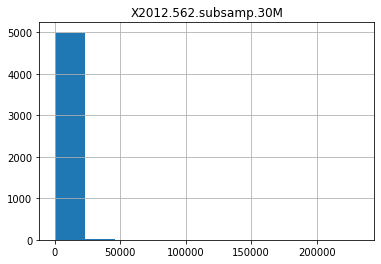

In [59]:
## Example Visualization 
mcf7.hist(column='X2012.562.subsamp.30M')


In [60]:
## Take log to clean up 
## Add 1 to avoid log(0) issues
log_df = mcf7.apply(lambda x: np.log10(x+1) if np.issubdtype(x.dtype, np.number) else x)
log_df.head()


,gene_names,X2012.562.subsamp.30M,X2012.574.subsamp.30M,X2012.563.subsamp.30M,X2012.577.subsamp.30M,X2012.564.subsamp.30M,X2012.572.subsamp.30M,X2012.565.subsamp.30M,X2012.576.subsamp.30M,X2012.566.subsamp.30M,X2012.570.subsamp.30M,X2012.568.subsamp.30M,X2012.575.subsamp.30M,X2012.569.subsamp.30M,X2012.571.subsamp.30M
0,A1BG,1.505150,1.230449,1.681241,1.146128,1.579784,1.447158,1.612784,1.591065,1.397940,1.204120,1.146128,1.491362,1.531479,1.518514
1,A1BG-AS1,2.354108,2.212188,2.328380,2.222716,2.404834,2.250420,2.357935,2.338456,2.292256,2.220108,2.243038,2.283301,2.245513,2.255273
2,A1CF,0.000000,0.000000,0.000000,0.301030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,A2LD1,1.963788,1.755875,1.863323,1.897627,1.986772,1.838849,1.959041,1.845098,2.012837,1.919078,1.934498,1.869232,1.963788,1.819544
4,A2M,0.698970,0.602060,1.041393,0.602060,0.477121,0.602060,0.000000,0.602060,1.000000,0.778151,0.698970,0.602060,0.903090,0.477121


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a342a0a58>]],
      dtype=object)

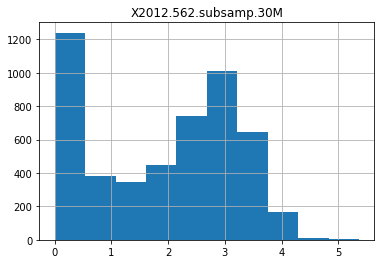

In [38]:
## log transform hist to illustrate dist'n
log_df.hist('X2012.562.subsamp.30M')


In [89]:
## Transpose and change column names
transposed_df = mcf7.T
transposed_df.head(5)

transposed_df.columns = transposed_df.iloc[0]
transposed_df=transposed_df[1:]

transposed_df.head()

gene_names,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AA06,AAA1,...,DIO3,DIO3OS,DIP2A,DIP2B,DIP2C,DIRAS1,DIRAS2,DIRAS3,DIRC1,DIRC2
X2012.562.subsamp.30M,31,225,0,91,4,4,14,0,0,1,...,7,2,2758,3484,1327,79,57,2,0,553
X2012.574.subsamp.30M,16,162,0,56,3,2,37,0,0,0,...,13,1,1845,2432,886,111,50,1,0,493
X2012.563.subsamp.30M,47,212,0,72,10,3,39,0,0,0,...,26,2,3016,2753,1287,84,69,0,0,480
X2012.577.subsamp.30M,13,166,1,78,3,1,33,1,0,2,...,19,5,2559,3467,1250,70,56,0,1,486
X2012.564.subsamp.30M,37,253,0,96,2,3,32,0,0,1,...,19,1,2570,2899,1230,84,73,0,0,510


In [93]:
# create training matrix 
y = [1,0,1,0,1,0,1,0,1,0,1,0, 1,0]
X = transposed_df

In [108]:
feat = binomialRF.binomialRF(X,y, 100, .3)
rf_model = feat.fit_model()


In [113]:
# calculate naive pvalues
main_effects = feat.get_main_effects(rf_model)
naive_pvalues = feat.calculate_naive_pvalue(main_effects)
naive_pvalues


,feature,TestStatistic,pvalues,FDR
0,[-2],13,6.785914e-13,3.021765e-10
1,[1231],1,6.415141e-01,1.000000e+00
2,[779],1,6.415141e-01,1.000000e+00
3,[2423],1,6.415141e-01,1.000000e+00
4,[2739],1,6.415141e-01,1.000000e+00
...,...,...,...,...
83,[2130],1,6.415141e-01,1.000000e+00
84,[1892],1,6.415141e-01,1.000000e+00
85,[3398],1,6.415141e-01,1.000000e+00
86,[2059],1,6.415141e-01,1.000000e+00


In [116]:
# calculate correlated adjusted p-values 
# cbinom = feat.calculate_cbinom()
# correl_pvalues = feat.calculate_correlated_pvalues(main_effects, cbinom)
# print(correl_pvalues)

AttributeError: 'binomialRF' object has no attribute 'subsample_percentage'